In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# no dataset so creating fake data
n_customers = 500

financial_data = {
  'Income': np.random.normal(50000, 20000, n_customers),
  'Spending': np.random.normal(15000, 8000, n_customers),
  'Savings': np.random.normal(10000, 5000, n_customers),
  'Investments': np.random.normal(5000, 3000, n_customers),
  'CreditScore': np.random.normal(700, 100, n_customers),
  'DebtAmount': np.random.normal(8000, 6000, n_customers),
  'LoanAmount': np.random.normal(20000, 10000, n_customers)
}

df = pd.DataFrame(financial_data)
df = df.clip(lower=0)

df

,Income,Spending,Savings,Investments,CreditScore,DebtAmount,LoanAmount
0,59934.283060,22409.420380,16996.777183,7335.083228,632.482173,11423.677983,921.924421
1,47234.713977,30275.333124,14623.168415,3346.442851,685.548133,13809.107963,11396.149892
2,62953.770762,3811.459409,10298.151850,2545.403350,620.758008,6012.149701,15863.944666
3,80460.597128,19503.753894,6765.316111,4989.876628,669.203847,4326.579593,38876.876573
4,45316.932506,9794.859447,13491.116568,4489.446132,510.638533,1489.096841,25565.531245
...,...,...,...,...,...,...,...
495,60778.200874,12751.197657,20030.464441,8210.450715,781.320519,8464.883111,39351.540401
496,29255.076913,29381.492215,20307.517883,4920.436222,672.103707,9546.515241,28155.010224
497,46193.226438,20126.742890,16041.831153,2354.376046,672.023983,549.436547,19519.114927
498,32487.634932,10430.568082,15120.312629,4510.799108,779.037190,10005.058503,18168.495289


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Income       500 non-null    float64
 1   Spending     500 non-null    float64
 2   Savings      500 non-null    float64
 3   Investments  500 non-null    float64
 4   CreditScore  500 non-null    float64
 5   DebtAmount   500 non-null    float64
 6   LoanAmount   500 non-null    float64
dtypes: float64(7)
memory usage: 27.5 KB


,Income,Spending,Savings,Investments,CreditScore,DebtAmount,LoanAmount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,50171.200390,15321.057598,10579.377128,5163.650863,698.848364,8382.689822,19922.133672
std,19525.102768,7673.668986,4960.725366,2810.389635,95.956615,5592.127427,10140.663537
min,0.000000,0.000000,0.000000,0.000000,398.048784,0.000000,0.000000
25%,35993.851911,10237.666081,6987.851911,3164.191514,633.926360,4237.085613,12669.362041
50%,50255.942927,15228.252796,10599.029238,4973.259908,699.684769,8021.213535,19800.127571
75%,62735.665083,20209.938380,13773.691816,7099.308228,766.917640,11793.602822,26952.527937
max,127054.629813,36059.056519,23008.415571,14579.322704,1010.991856,31557.426239,48684.030557


In [ ]:
ss = StandardScaler()
X_scaled = ss.fit_transform(df)

In [ ]:
pca_full = PCA()
pca_full.fit(X_scaled)

print("Explained variance ratio:")
print(pca_full.explained_variance_ratio_)
print("\nCumulative variance:")
print(np.cumsum(pca_full.explained_variance_ratio_))

Explained variance ratio:
[0.1684364  0.16392871 0.1454779  0.14016998 0.13147102 0.12899535
 0.12152064]

Cumulative variance:
[0.1684364  0.3323651  0.477843   0.61801299 0.74948401 0.87847936
 1.        ]


Components for 80% variance: 6


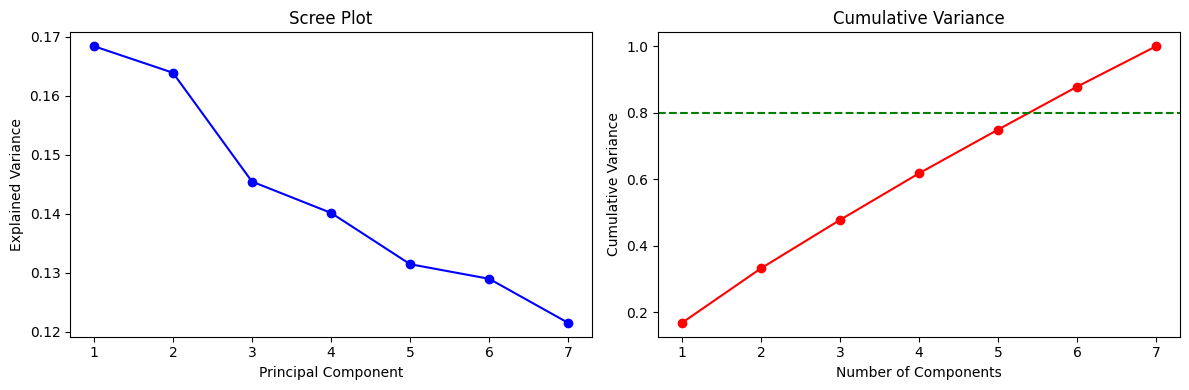

In [ ]:
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
n_components = np.argmax(cumsum_var >= 0.80) + 1

print(f"Components for 80% variance: {n_components}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'ro-')
plt.axhline(y=0.80, color='g', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance')

plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape: {X_pca.shape}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.4f}")

Original shape: (500, 7)
Reduced shape: (500, 6)
Total variance explained: 0.8785


In [ ]:
# Analyze feature contributions
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(
  loadings,
  columns=[f'PC{i+1}' for i in range(n_components)],
  index=df.columns
)

print("Feature Contributions:")
print(loading_df.round(3))

Feature Contributions:
               PC1    PC2    PC3    PC4    PC5    PC6
Income      -0.543 -0.263  0.257 -0.075  0.691 -0.174
Spending     0.563  0.144  0.415  0.438  0.129  0.120
Savings      0.603 -0.155 -0.308  0.066  0.586 -0.012
Investments -0.228 -0.584  0.041  0.412 -0.069  0.640
CreditScore -0.066  0.595  0.353 -0.336  0.217  0.553
DebtAmount   0.217 -0.375  0.740 -0.161 -0.176 -0.269
LoanAmount  -0.320  0.447  0.115  0.688  0.043 -0.270


In [ ]:
# Create transformed dataset
pca_df = pd.DataFrame(
  X_pca,
  columns=[f'PC{i+1}' for i in range(n_components)]
)

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.487301,-1.964453,0.087679,-0.378264,0.878855,0.505524
1,2.124654,-0.234615,1.055735,-0.037590,0.451571,-0.288702
2,-0.858902,-0.317017,-1.111479,-1.036140,0.176704,-1.174892
3,-1.583666,0.698928,0.424755,1.567695,0.873432,-0.752671
4,-0.164595,-0.416503,-2.074864,0.892438,-0.094155,-1.164772


In [ ]:
print("PCA Summary:")
print(f"Dimensionality reduced from {df.shape[1]} to {n_components} features")
print(f"Variance retained: {pca.explained_variance_ratio_.sum()*100:.2f}%")
print(f"Reduction: {((1 - n_components/df.shape[1])*100):.1f}%")

for i, var in enumerate(pca.explained_variance_ratio_, 1):
  print(f"PC{i}: {var*100:.2f}%")

PCA Summary:
Dimensionality reduced from 7 to 6 features
Variance retained: 87.85%
Reduction: 14.3%
PC1: 16.84%
PC2: 16.39%
PC3: 14.55%
PC4: 14.02%
PC5: 13.15%
PC6: 12.90%
